# Biopython

## Sequences and records

Load the required modules.

In [48]:
from Bio import SeqIO

Read a GenBank sequence file.

In [49]:
seq_records = SeqIO.parse('Data/382544572.gbk', 'genbank')

This file has just a single record, so we access that one.

In [50]:
seq_record = next(seq_records)

Some metadata can be printed.

In [51]:
print('ID: ', seq_record.id)
print('Name: ', seq_record.name)
print('Description: ', seq_record.description)
print('Length: ', len(seq_record))

ID:  NG_007109.2
Name:  NG_007109
Description:  Homo sapiens mutL homolog 1 (MLH1), RefSeqGene (LRG_216) on chromosome 3.
Length:  79540


Check the number of features.

In [52]:
print('Number of features: ', len(seq_record.features))

Number of features:  36


Figure out which features we have in the record, and what index they have in the list.

In [53]:
features = dict()
for i, feature in enumerate(seq_record.features):
    if feature.type not in features:
        features[feature.type] = []
    features[feature.type].append(i)
for type in features:
    print('{0}: {1}'.format(type, ','.join(str(x) for x in features[type])))

source: 0
exon: 6,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26
mRNA: 2,5,28,29,30,31
gene: 1,4,16,27
CDS: 3,7,32,33,34,35


Which genes do we have?

In [54]:
for index in features['gene']:
    print(seq_record.features[index])

type: gene
location: [<0:4955](-)
qualifiers:
    Key: db_xref, Value: ['GeneID:9852', 'HGNC:HGNC:19735', 'MIM:607911']
    Key: gene, Value: ['EPM2AIP1']
    Key: note, Value: ['EPM2A interacting protein 1']

type: gene
location: [5000:62497](+)
qualifiers:
    Key: db_xref, Value: ['GeneID:4292', 'HGNC:HGNC:7127', 'MIM:120436']
    Key: gene, Value: ['MLH1']
    Key: gene_synonym, Value: ['COCA2; FCC2; hMLH1; HNPCC; HNPCC2']
    Key: note, Value: ['mutL homolog 1']

type: gene
location: [28048:28685](-)
qualifiers:
    Key: db_xref, Value: ['GeneID:100131713', 'HGNC:HGNC:36905']
    Key: gene, Value: ['RPL29P11']
    Key: gene_synonym, Value: ['RPL29_2_362']
    Key: note, Value: ['ribosomal protein L29 pseudogene 11']
    Key: pseudo, Value: ['']

type: gene
location: [64276:>79540](-)
qualifiers:
    Key: db_xref, Value: ['GeneID:9209', 'HGNC:HGNC:6703', 'MIM:614043']
    Key: gene, Value: ['LRRFIP2']
    Key: gene_synonym, Value: ['HUFI-2']
    Key: note, Value: ['LRR binding FLII

We're interested in the MLH1 gene, so we look at this feature in detail.

In [55]:
mklh1_feature = seq_record.features[4]

The location is of special interest if we want to slice the record.

In [56]:
start_pos = int(mklh1_feature.location.start)
end_pos = int(mklh1_feature.location.end)

In [57]:
mklh1_record = seq_record[start_pos:end_pos]

Note that the subseqence record has retained a number of features, but only those that pertain to the subsequence itself.

In [58]:
len(mklh1_record.features)

23

In [59]:
for feature in mklh1_record.features:
    print(feature)

type: gene
location: [0:57497](+)
qualifiers:
    Key: db_xref, Value: ['GeneID:4292', 'HGNC:HGNC:7127', 'MIM:120436']
    Key: gene, Value: ['MLH1']
    Key: gene_synonym, Value: ['COCA2; FCC2; hMLH1; HNPCC; HNPCC2']
    Key: note, Value: ['mutL homolog 1']

type: mRNA
location: join{[0:314](+), [3269:3360](+), [7605:7704](+), [11051:11125](+), [13641:13714](+), [15464:15556](+), [18470:18513](+), [18661:18750](+), [21082:21195](+), [24156:24250](+), [26960:27114](+), [32287:32658](+), [35434:35583](+), [46836:46945](+), [48918:48982](+), [54169:54334](+), [55167:55260](+), [55554:55668](+), [57136:57497](+)}
qualifiers:
    Key: db_xref, Value: ['GI:263191547', 'LRG:t1', 'GeneID:4292', 'HGNC:HGNC:7127', 'MIM:120436']
    Key: gene, Value: ['MLH1']
    Key: gene_synonym, Value: ['COCA2; FCC2; hMLH1; HNPCC; HNPCC2']
    Key: product, Value: ['mutL homolog 1, transcript variant 1']
    Key: transcript_id, Value: ['NM_000249.3']
Sub-Features
type: mRNA
location: [0:314](+)
qualifiers:

t

The length of this subsequence if of course less than that of the entire sequence.

In [60]:
len(mklh1_record)

57497

## Phylogenetic trees

Import the `Phylo` module, and set `matplotlib` configuration.

In [61]:
from Bio import Phylo
%matplotlib inline

Reader the tree from a Neewick file, this tree is annotated with branch lengths.

In [62]:
tree = Phylo.read('Data/crab.tree', 'newick')

Create a plot for the tree, note that branch lengths are respected.

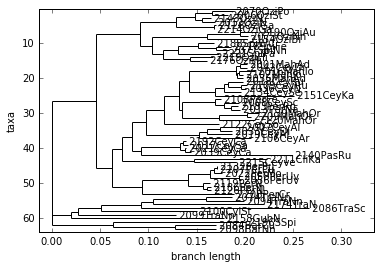

In [63]:
Phylo.draw(tree)

Check the number of terminal clades.

In [64]:
terminal_clades = tree.get_terminals()

In [65]:
tree.count_terminals()

63

Examine properties of a clade.

In [66]:
clade = terminal_clades[0]

In [67]:
print(clade.name)
print(clade.branch_length)

2070OziPo
0.021138


Get the path from the tree's root to this clade.

In [68]:
tree.get_path(clade)

[Clade(branch_length=0.045735),
 Clade(branch_length=0.045783),
 Clade(branch_length=0.037123),
 Clade(branch_length=0.019266),
 Clade(branch_length=0.018156),
 Clade(branch_length=0.021138, name='2070OziPo')]

Compute the depths of all clades, and print those of the terminal ones.

In [69]:
depths = tree.depths()
for clade in tree.get_terminals():
    print('{0}: {1:.3f}'.format(clade.name, depths[clade]))

2070OziPo: 0.187
2006OziSt: 0.183
2143OziN: 0.165
2012OziN: 0.169
2128OziGa: 0.170
2214OziGa: 0.168
2190OziAu: 0.213
2073OziNn: 0.203
2154OziBi: 0.203
2188SpiWu: 0.168
2218SpiFe: 0.185
2077SpiNn: 0.184
2221SpiPa: 0.173
2219OziHi: 0.167
2176OziHi: 0.161
2001MahAd: 0.202
2042CeyDi: 0.202
2016MahIo: 0.211
2102MahIo: 0.198
2035MahAd: 0.198
2018CeyRu: 0.198
2109CeyRu: 0.202
2036CeyN: 0.201
2134CeySe: 0.196
2151CeyKa: 0.250
2108PerFe: 0.175
2008CeySc: 0.194
2183PerRo: 0.193
2013PerNa: 0.195
2139MahOr: 0.215
2209MahOr: 0.206
2120MahOr: 0.210
2122CeySo: 0.173
2007CeyAl: 0.198
2033CeyDi: 0.186
2019CeyAl: 0.187
2106CeyAr: 0.206
2192CeyCa: 0.139
2017CeySa: 0.141
2021CeyCa: 0.139
2039CeyCa: 0.144
2140PasRu: 0.249
2211CliKa: 0.223
2215Ceyve: 0.190
2132PerPu: 0.171
2207PerPu: 0.171
2022PerMo: 0.177
2058PerUv: 0.196
2056PerUv: 0.196
2119PerN: 0.164
2186PerIn: 0.165
2126PerN: 0.165
2208PerCr: 0.188
2074TraNn: 0.187
2094TraNn: 0.199
2174TraN: 0.219
2086TraSc: 0.267
2100CylSt: 0.150
2099TraNn: 0.129
215

Take the first five terminal clades, and compute the distance matrix.